<a href="https://colab.research.google.com/github/yusuf302/Codveda-internship-data-analysis/blob/main/Stock_Prices_Data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Stock Prices Data Set.csv to Stock Prices Data Set.csv


In [4]:
df = pd.read_csv("Stock Prices Data Set.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [8]:
daily_close_price = df['close'].resample('D').mean()
display(daily_close_price.head())

,close
date,
2014-01-02,71.610728
2014-01-03,71.666974
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,71.422432


In [7]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
display(df.head())

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391


In [ ]:
print("Missing values before handling:")
print(daily_close_price.isnull().sum())

# Impute missing values using forward fill
daily_close_price = daily_close_price.ffill()

print("\nMissing values after handling:")
print(daily_close_price.isnull().sum())
display(daily_close_price.head())

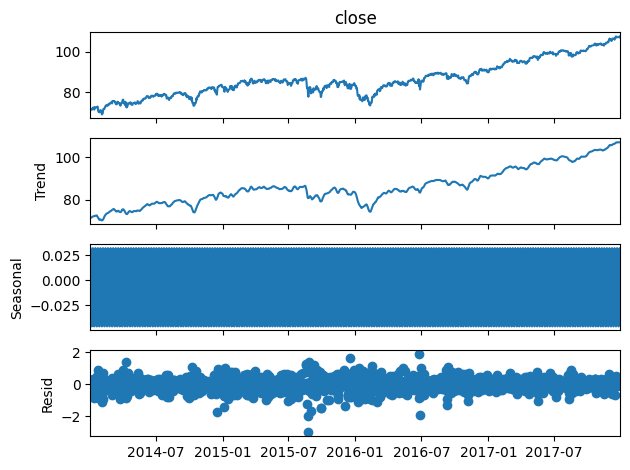

In [13]:
decomposition = sm.tsa.seasonal_decompose(daily_close_price, model='additive')
fig = decomposition.plot()
plt.show()

In [12]:
print("Missing values before handling:")
print(daily_close_price.isnull().sum())

# Impute missing values using forward fill
daily_close_price = daily_close_price.ffill()

print("\nMissing values after handling:")
print(daily_close_price.isnull().sum())
display(daily_close_price.head())

Missing values before handling:
451

Missing values after handling:
0


,close
date,
2014-01-02,71.610728
2014-01-03,71.666974
2014-01-04,71.666974
2014-01-05,71.666974
2014-01-06,71.422432


In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_close_price.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.501455
p-value: 0.891732
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


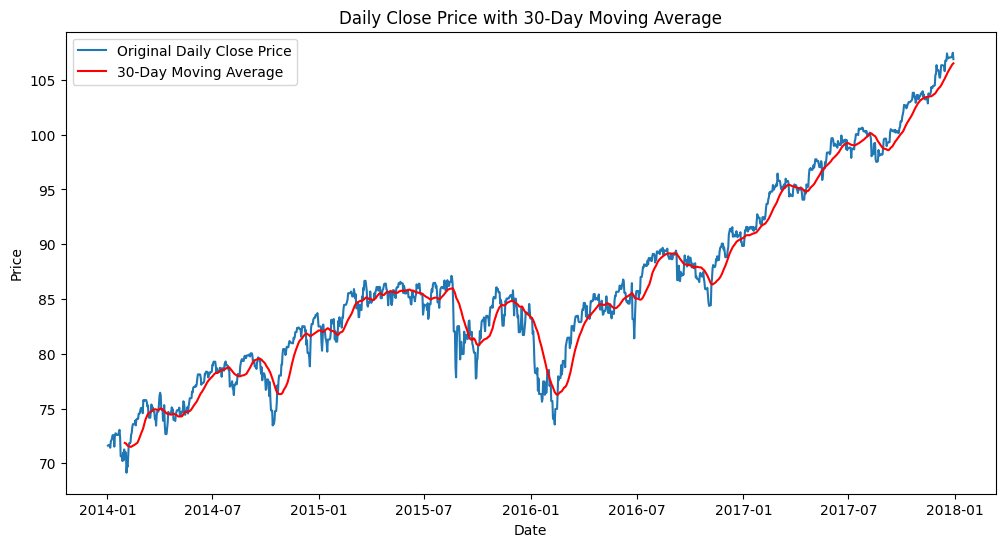

In [15]:
moving_avg = daily_close_price.rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_close_price, label='Original Daily Close Price')
plt.plot(moving_avg, label='30-Day Moving Average', color='red')
plt.title('Daily Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

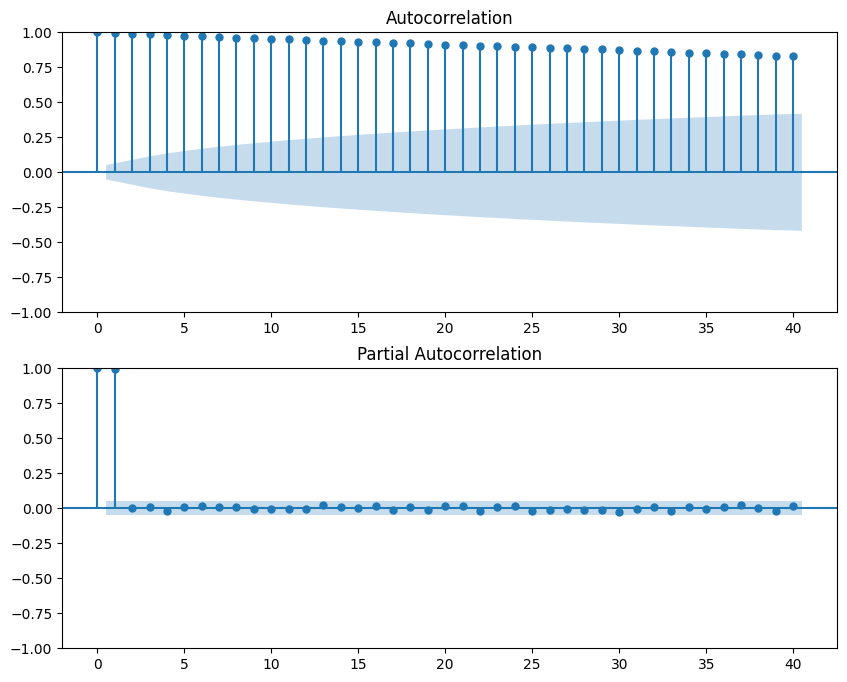

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(daily_close_price.dropna(), lags=40, ax=axes[0])
plot_pacf(daily_close_price.dropna(), lags=40, ax=axes[1])
plt.show()

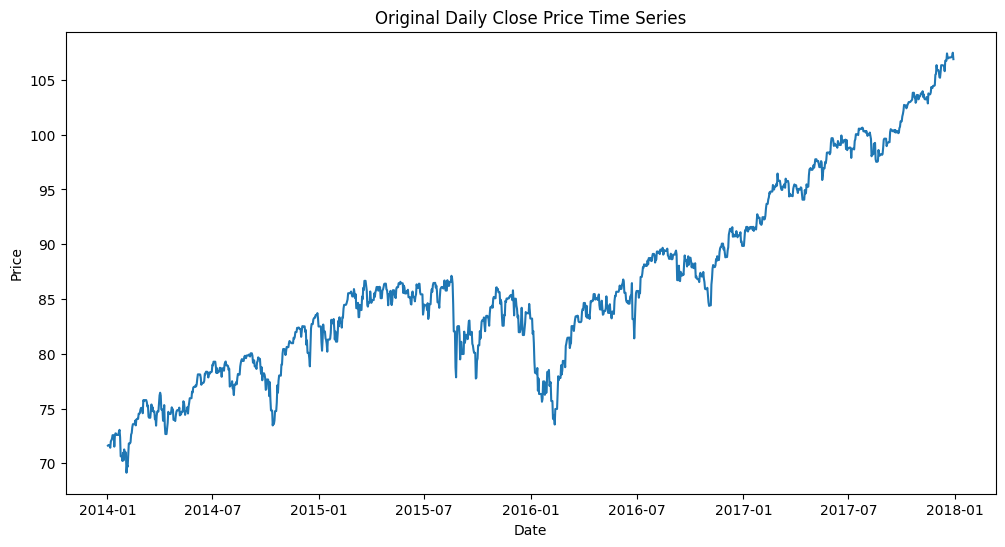

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(daily_close_price)
plt.title('Original Daily Close Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1, 1, 0) model
model = ARIMA(daily_close_price, order=(1, 1, 0))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1458
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1160.666
Date:                Thu, 23 Oct 2025   AIC                           2325.333
Time:                        13:29:52   BIC                           2335.901
Sample:                    01-02-2014   HQIC                          2329.276
                         - 12-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0438      0.018     -2.379      0.017      -0.080      -0.008
sigma2         0.2880      0.006     49.568      0.000       0.277       0.299
Ljung-Box (L1) (Q):                   0.02   Jarque-

In [19]:
# Forecast future values
forecast_steps = 30  # Forecast for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecast
print("Forecasted daily close prices for the next", forecast_steps, "days:")
print(forecast)

Forecasted daily close prices for the next 30 days:
2017-12-30    106.917414
2017-12-31    106.916289
2018-01-01    106.916338
2018-01-02    106.916336
2018-01-03    106.916336
2018-01-04    106.916336
2018-01-05    106.916336
2018-01-06    106.916336
2018-01-07    106.916336
2018-01-08    106.916336
2018-01-09    106.916336
2018-01-10    106.916336
2018-01-11    106.916336
2018-01-12    106.916336
2018-01-13    106.916336
2018-01-14    106.916336
2018-01-15    106.916336
2018-01-16    106.916336
2018-01-17    106.916336
2018-01-18    106.916336
2018-01-19    106.916336
2018-01-20    106.916336
2018-01-21    106.916336
2018-01-22    106.916336
2018-01-23    106.916336
2018-01-24    106.916336
2018-01-25    106.916336
2018-01-26    106.916336
2018-01-27    106.916336
2018-01-28    106.916336
Freq: D, Name: predicted_mean, dtype: float64


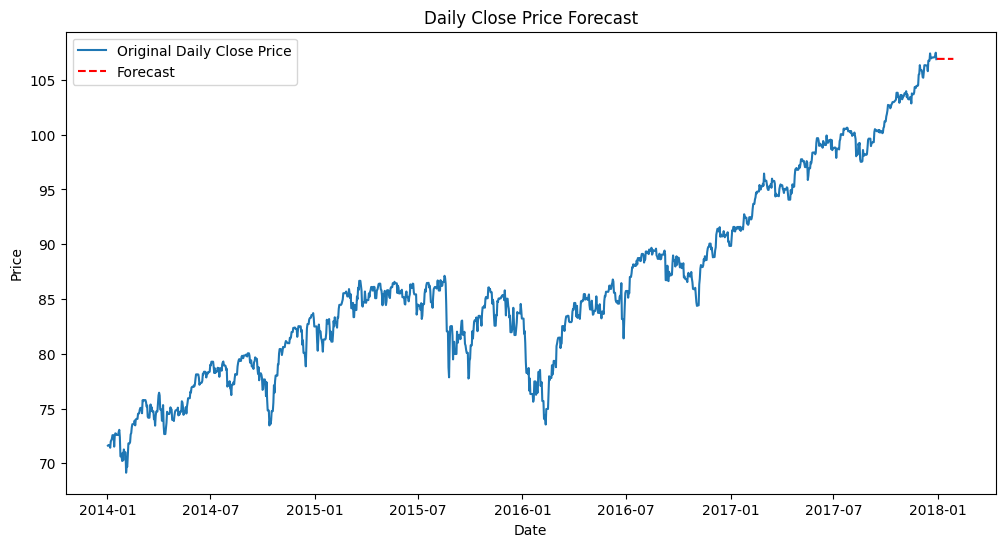

In [20]:
# Plot the original data, historical values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_close_price.index, daily_close_price, label='Original Daily Close Price')
plt.plot(forecast.index, forecast, color='red', linestyle='--', label='Forecast')
plt.title('Daily Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

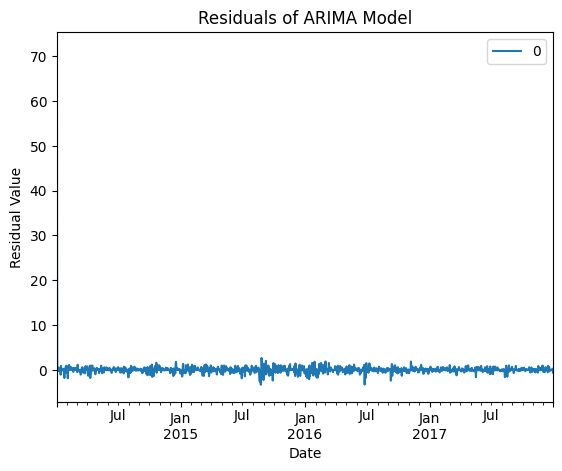

                 0
count  1458.000000
mean      0.074391
std       1.949905
min      -3.277511
25%      -0.096966
50%       0.000000
75%       0.212086
max      71.610728


In [21]:
# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.show()

print(residuals.describe())

## Time Series Analysis Summary

Here is a summary of the time series analysis performed on the daily close price data:

1.  **Data Preparation and Handling:** We loaded the data, converted the 'date' column to datetime objects, set it as the index, resampled the data to a daily frequency, and handled missing values using forward fill.
2.  **Time Series Decomposition:** We decomposed the daily close price series into its trend, seasonality, and residual components, which helped visualize the underlying patterns in the data.
3.  **Moving Average Smoothing:** We applied a 30-day moving average to smooth out short-term fluctuations and highlight the longer-term trend.
4.  **Stationarity Testing:** The Augmented Dickey-Fuller test indicated that the original time series was not stationary (p-value > 0.05).
5.  **ACF and PACF Plots:** Analysis of the ACF and PACF plots suggested potential parameters for an ARIMA model, indicating a significant lag at 1 in the PACF.
6.  **ARIMA Model Fitting and Forecasting:** We fitted an ARIMA(1,1,0) model to the data, which accounts for the non-stationarity (the '1' in the order indicates differencing). We then used this model to forecast the daily close prices for the next 30 days.
7.  **Model Evaluation (Residuals):** We examined the residuals of the fitted model. The plot of residuals shows some fluctuations, and the descriptive statistics provide insights into their distribution. Further model evaluation could involve comparing forecasts to actual values on a held-out test set or using metrics like Mean Squared Error (MSE) if a test set was available.

Overall, the analysis provided insights into the trend and potential patterns in the stock's daily close price and demonstrated how to fit and use an ARIMA model for forecasting.